# Generative Adversarial Network
(GAN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tqdm

In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.layers import Conv2D, Flatten, MaxPooling2D, Reshape

from keras.optimizers import Adam

In [4]:
from keras.datasets import mnist

In [5]:
discriminator = Sequential()

discriminator.add(Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
discriminator.add(Dropout(0.2))
discriminator.add(MaxPooling2D())

discriminator.add(Conv2D(filters=6, kernel_size=(3, 3), strides=(1, 1), activation='relu',))
discriminator.add(Dropout(0.2))
discriminator.add(MaxPooling2D())

discriminator.add(Conv2D(filters=12, kernel_size=(3, 3), strides=(1, 1), activation='relu',))
discriminator.add(Dropout(0.2))

discriminator.add(Conv2D(filters=24, kernel_size=(3, 3), strides=(1, 1), activation='relu',))
discriminator.add(Dropout(0.2))

discriminator.add(Flatten())

discriminator.add(Dense(units=64, activation='relu'))
discriminator.add(Dropout(0.2))
discriminator.add(Dense(units=1, activation='softmax'))

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['acc'])

In [6]:
noise_dim = 100

In [7]:
generator = Sequential()

generator.add(Dense(units=128, activation='relu', input_dim=noise_dim))
generator.add(BatchNormalization())
generator.add(Dropout(0.2))

generator.add(Dense(units=256, activation='relu'))
generator.add(BatchNormalization())
generator.add(Dropout(0.2))

generator.add(Dense(units=512, activation='relu'))
generator.add(BatchNormalization())
generator.add(Dropout(0.2))

generator.add(Dense(units=784, activation='relu'))
generator.compile(loss='mae', optimizer='adam')

generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               12928     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 256)              

In [8]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 dropout (Dropout)           (None, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 3)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 6)         168       
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 6)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 6)           0         
 g2D)                                                   

In [9]:
discriminator.trainable = False
gan = Sequential()

gan.add(generator)
gan.add(Reshape(target_shape=(28, 28, 1)))
gan.add(discriminator)

gan.compile(loss='binary_crossentropy', optimizer=Adam(1e-4))

gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 784)               583312    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 sequential (Sequential)     (None, 1)                 5139      
                                                                 
Total params: 588451 (2.24 MB)
Trainable params: 581520 (2.22 MB)
Non-trainable params: 6931 (27.07 KB)
_________________________________________________________________


In [16]:
def plot_loss(losses):
    d_losses = [v for v in losses['D']]
    g_losses = [v for v in losses['G']]
    plt.figure(figsize=(10, 8))
    plt.plot(d_losses, label='Discriminator Loss', c='g')
    plt.plot(g_losses, label='Generator Loss', c='b')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
    noise = np.random.normal(0, 1, size=(n_ex, noise_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(n_ex, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 21ms/step


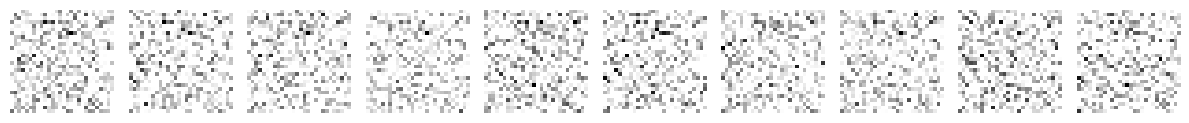

In [17]:
plot_generated()